# 0. Application of the K-NN method to the classification problem

The provided dataset comes from the 1994 census and contains information about a certain number of people living in the United States. The problem is to predict whether or not a person earns more than $50k per year. List of features:

*   <b>age</b>: age of a person.
*   <b>workclass</b>: the employment status of an individual.
*   <b>fnlwgt</b>: final weight, representing the number of individuals that this row represents (a representative sample).
*   <b>education</b>: highest level of education achieved by an individual.
*   <b>education-num</b>: highest level of education achieved by an individual in numerical form.
*   <b>marital-status</b>: marital status of an individual. Note that Married-civ-spouse refers to a civilian spouse, and Married-AF-spouse refers to a spouse in the Armed Forces.
*   <b>occupation</b>: general type of occupation of an individual.
*   <b>relationship</b>: relationship of this individual with others, for example, spouse (Husband). Each data point has only one relationship (echoing the <b>marital-status</b> feature).
*   <b>race</b>: race.
*   <b>sex</b>: biological sex of an individual.
*   <b>capital-gain</b>: capital gains of an individual.
*   <b>capital-loss</b>: capital losses of an individual.
*   <b>hours-per-week</b>: number of hours the individual reported working per week.
*   <b>native-country</b>: country of origin.
*   <b>label</b>: income (target), more than $50,000 (>50K) or not (<=50K).



## A bit about model quality metrics

First, let's look at the so-called confusion matrix -- a way to divide objects into $4$ groups depending on the combination of the true class and the classifier prediction:

-   TP (True Positives) -- correctly classified objects originally belonging to the class "$+1$";

-   TN (True Negatives) -- correctly classified objects originally belonging to the class "$-1$";

-   FN (False Negatives) -- misclassified objects that originally belonged to the class "$+1$" (type I error);

-   FP (False Positives) -- misclassified objects that originally belonged to the class "$-1$" (type II error).

Usually, of course, it is not absolute rates that are used, but relative ones (rates), ranging from $0$ to $1$:

-   proportion of correct classifier predictions (so-called accuracy): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ This value shows the ratio of the number of correctly classified objects to the total number of classified objects and, roughly speaking, estimates the probability of a random object to be correctly classified.

-   proportion of true positive predictions -- True Positives Rate (TPR), or Sensitivity, or Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ This value shows the ratio of the number of correctly classified objects belonging to class "$+1$" to the total number of objects belonging to class "$+1$". In other words, it is an estimate of the probability that an object belonging to class "$+1$" will be correctly classified.

-   proportion of false positive predictions -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ The value indicates the ratio of the number of misclassified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be misclassified.

-   Specificity or True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ The value indicates the ratio of the number of correctly classified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be classified correctly.

-   Precision: $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ The value indicates what proportion of objects assigned to the "$+1$" class by the classifier actually belong to this class.

The question that naturally arises is whether there is some generalizable criterion,
that can characterize the quality of the model. One of them is
the so-called $F$-measure ($F_1$-measure, $F$ score, $F_1$ score).
is defined by the following relationship:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Remark**. *The $F$-measure is the harmonic mean of the values
$\mathsf{Precision}$ and $\mathsf{Recall}$ and is in the range of
$[0, 1]$. The harmonic mean has an important property: it is close to
zero if at least one of the arguments is close to zero. Therefore, it is
much more preferable than, say, the arithmetic mean: if the
algorithm assigns all objects to a positive class, then
$\mathsf{Recall}= 1$, and $\mathsf{Precision}$ is likely to be
small. But then the arithmetic mean will be greater than $0.5$, which, of course, is just too bad.*

## Importing libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

Read the dataset into a dataframe. Based on the description of the features, you can get rid of the features <code>education</code> и <code>marital-status</code> right away. Remove the corresponding columns from the dataset.

In [9]:
data = pd.read_csv('adult_data_train.csv')
data1 =data.drop(columns = ['education', 'marital-status'])
data1.head()

# Determine the data types of each column
numeric_features = data1.select_dtypes(include=['number']).columns
non_numeric_features = data1.select_dtypes(exclude=['number']).columns

# Count the number of numeric and non-numeric features
num_numeric_features = len(numeric_features)
num_non_numeric_features = len(non_numeric_features)

# Print the results
print(f"Number of Numeric Features: {num_numeric_features}")
print(f"Number of Non-Numeric Features: {num_non_numeric_features}")

Number of Numeric Features: 7
Number of Non-Numeric Features: 6


Determine the number of numeric and non-numeric features.

In [10]:
data = pd.read_csv('adult_data_train.csv')
data1 =data.drop(columns = ['education', 'marital-status'])
data1.head()

# Determine the data types of each column
numeric_features = data1.select_dtypes(include=['number']).columns
non_numeric_features = data1.select_dtypes(exclude=['number']).columns

# Count the number of numeric and non-numeric features
num_numeric_features = len(numeric_features)
num_non_numeric_features = len(non_numeric_features)

# Print the results
print(f"Number of Numeric Features: {num_numeric_features}")
print(f"Number of Non-Numeric Features: {num_non_numeric_features}")

Number of Numeric Features: 7
Number of Non-Numeric Features: 6


Construct a histogram of the objects distribution by classes. Calculate the proportion of objects in the class $0$.

0.759


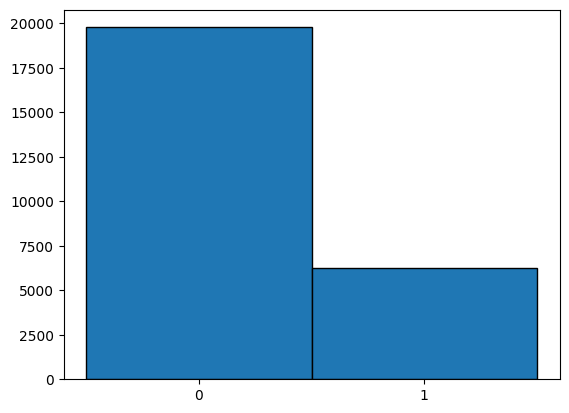

In [15]:
data1.head()

plt.hist(data1['label'], bins = [-0.5,0.5, 1.5], edgecolor= 'black', align = 'mid')
plt.xticks([0,1])

cal_0_proportion = data1['label'].value_counts(normalize = True).get(0,0)
print(round(cal_0_proportion, 3))
plt.show()

# 1. Building a base model

As a first approximation, it makes sense to build a classification model relying solely on numerical features.

Select only numerical features from the dataset. Use <code>train_test_split()</code> to split the dataset into training and test samples <b>with the parameters specified in your assignment</b>. Use stratification by column <code>label</code>.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset.

Train <code>KNeighborsClassifier()</code> model with default parameters on the training dataset.

As can be seen from the previous step, there is a clear imbalance of class representatives in the dataset. This should be taken into account when evaluating the model. Compute <code>f1_score()</code> for the test dataset (we recommend to use a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">corresponding function</a> with default parameters).

Alternatively, you can use the so-called <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, where several metrics are given at once (do not forget about the parameter <code>digits</code>).

In [22]:
from sklearn.metrics import classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

numerical_features = data1.select_dtypes(include = ['number'])

X = numerical_features.drop('label', axis = 1)
y = data1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

fnlwgt_mean = X_train['fnlwgt'].mean()
print(f"Sample mean for 'fnlwgt' in the training dataset: {fnlwgt_mean:.3f}")

y_pred = model.predict(X_test)
# Compute f1_score
f1 = f1_score(y_test, y_pred, average='weighted')

# Use classification_report
cr = classification_report(y_test, y_pred, digits=3)

print(f"F1 Score (weighted): {f1:.3f}")
print("Classification Report:")
print(cr)

Sample mean for 'fnlwgt' in the training dataset: 189807.254
F1 Score (weighted): 0.749
Classification Report:
              precision    recall  f1-score   support

           0      0.808     0.918     0.859      3937
           1      0.560     0.324     0.410      1273

    accuracy                          0.773      5210
   macro avg      0.684     0.621     0.635      5210
weighted avg      0.747     0.773     0.749      5210



It is worth remembering that k-NN is a metric classifier, so feature values should be normalized before training the model.

Train the <code>MinMaxScaler()</code> transformation on the training dataset and apply it to the training and test datasets.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset after normalization.

Re-train and evaluate the model on the transformed data. Compute <code>f1_score()</code> for the test dataset. 

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select numerical features including the 'label' column
numerical_features = data1.select_dtypes(include=['number'])

# Specify the features (X) and the target variable (y)
X = numerical_features.drop('label', axis=1)  
y = numerical_features['label']  

# Split the dataset into training and test samples with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Train MinMaxScaler on the training dataset and apply it to both training and test datasets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate the sample mean for the column 'fnlwgt' in the scaled training dataset
fnlwgt_mean_scaled = X_train_scaled[:, X.columns.get_loc('fnlwgt')].mean()
rounded_fnlwgt_mean_scaled = round(fnlwgt_mean_scaled, 3)

print(f"Sample mean for 'fnlwgt' in the scaled training dataset: {rounded_fnlwgt_mean_scaled}")


Sample mean for 'fnlwgt' in the scaled training dataset: 0.123


In [24]:
# Select numerical features including the 'label' column
numerical_features = data1.select_dtypes(include=['number'])

# Specify the features (X) and the target variable (y)
X = numerical_features.drop('label', axis=1)  # Exclude the target variable 'label'
y = numerical_features['label']  # Use the 'label' column as the target variable

# Split the dataset into training and test samples with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Train MinMaxScaler on the training dataset and apply it to both training and test datasets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNeighborsClassifier with default parameters on the scaled training dataset
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Predict on the scaled test dataset
y_pred = model.predict(X_test_scaled)

# Compute f1_score for the test dataset
f1 = f1_score(y_test, y_pred, average='weighted')
rounded_f1 = round(f1, 3)

print(f"F1 Score (weighted): {rounded_f1}")

# Alternatively, use classification_report for a detailed report
cr = classification_report(y_test, y_pred, digits=3)
print("Classification Report:")
print(cr)

F1 Score (weighted): 0.787
Classification Report:
              precision    recall  f1-score   support

           0      0.839     0.904     0.870      3937
           1      0.610     0.465     0.528      1273

    accuracy                          0.797      5210
   macro avg      0.725     0.684     0.699      5210
weighted avg      0.783     0.797     0.787      5210



It can be seen that the quality has increased after linear normalization.

<b>Important:</b> Further steps involve using linear normalization immediately before training without additional reminders.

# 2. Working with non-numeric features

## Visualization

To further improve the quality of the model, it makes sense to leverage the non-numeric attributes of the original dataset (without columns <code>education</code> and <code>marital-status</code>). 

Construct histograms illustrating the frequency of a particular value for each non-numeric feature, e.g., using <code>sns.barplot()</code>.

workclass
occupation
relationship
race
sex
native-country


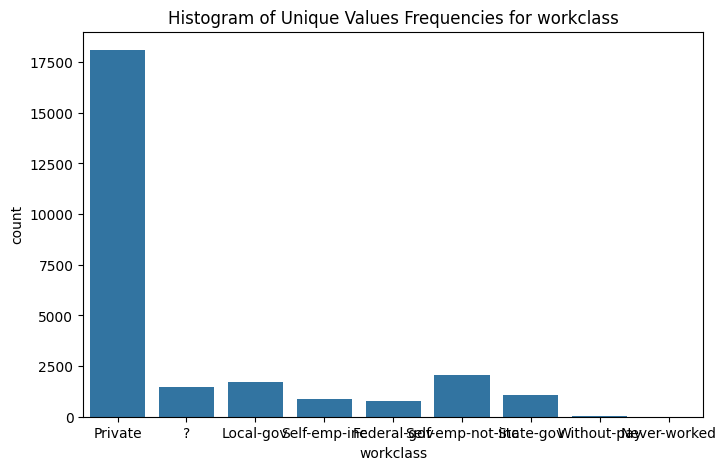

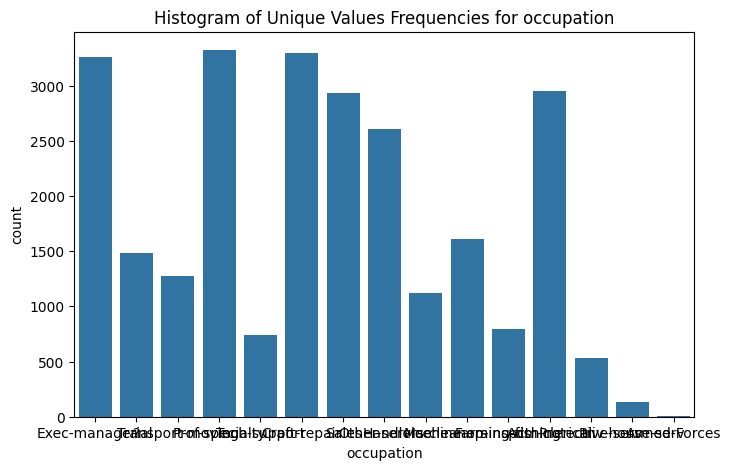

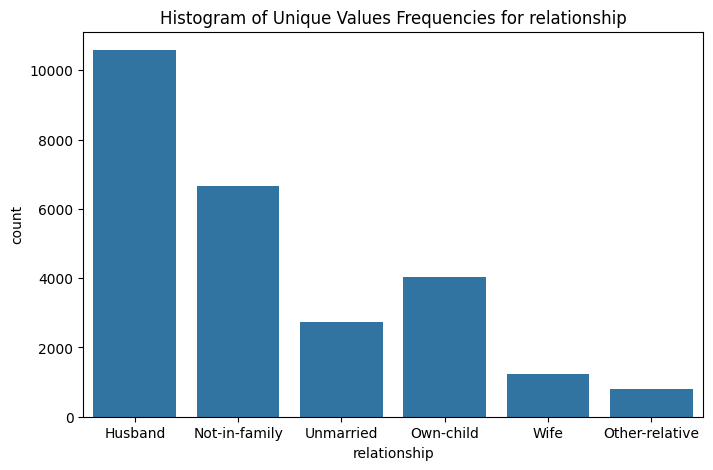

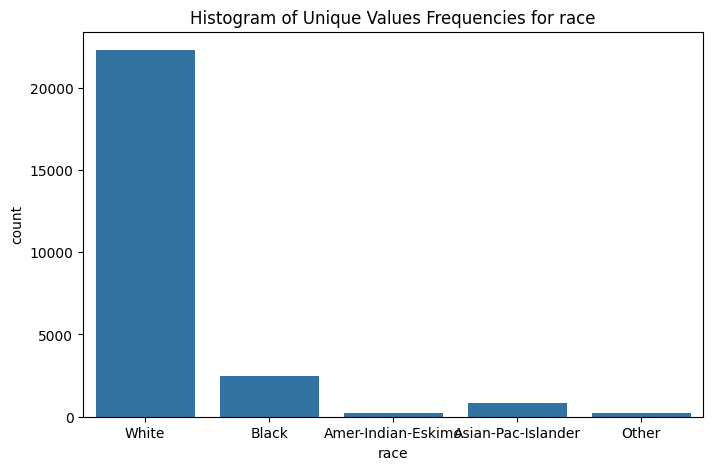

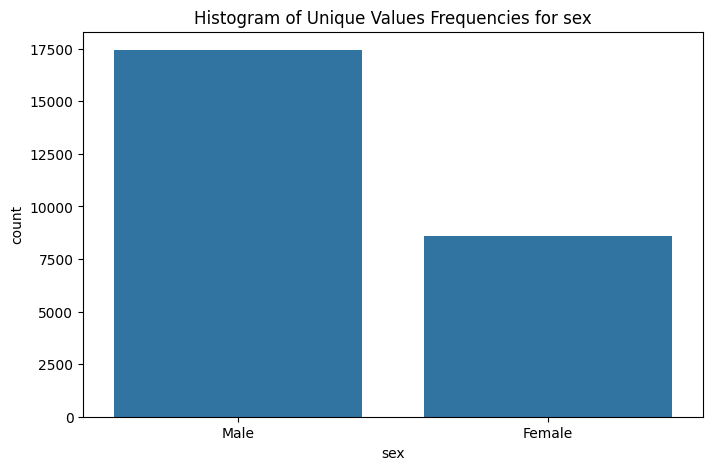

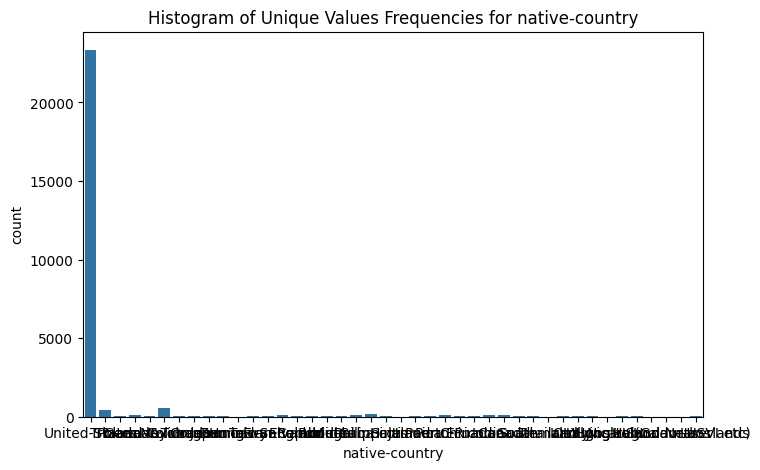

In [26]:
# Select non-numeric features
non_numeric_features = data1.select_dtypes(exclude=['number']).columns
for feature in non_numeric_features:
    print(feature)

# Plot histograms for each non-numeric feature
for feature in non_numeric_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=data1)
    plt.title(f'Histogram of Unique Values Frequencies for {feature}')
    plt.show()

## Removing missing values

Determine the number of rows in the original dataset (without columns <code>education</code> and <code>marital-status</code>) that contain at least one missing value.

In [30]:
data1.head()

# Count the number of rows with at least one missing value
rows_with_missing_values = data1[data1.isnull().any(axis=1)]

# Count the number of rows with at least one missing value
num_rows_with_missing_values = data1[data1.isnull().any(axis=1)].shape[0]

print(f"Number of rows with at least one missing value: {num_rows_with_missing_values}")

Number of rows with at least one missing value: 0


You can see that the dataset contains less than 10% of rows that contain missing values. Throwing out such a large number of rows is not a good thing, but why not try to train model without them. 

Remove rows containing missing values. Perform <code>one-hot</code> encoding of non-numeric features, e.g., using <code>pd.get_dummies(drop_first=True)</code>.

Enter the total number of features obtained.

In [32]:
# Remove rows containing missing values
data1_no_missing = data1.dropna()

# Perform one-hot encoding
data1_encoded = pd.get_dummies(data1_no_missing, drop_first=True)

# Get the total number of features obtained
num_features = data1_encoded.shape[1]

print(f"Total number of features obtained: {num_features}")

Total number of features obtained: 80


Using the resulting dataset, train the classification model in the same way as was done for the baseline model. Compute <code>f1_score()</code> for the test dataset.



In [33]:
# Remove rows containing missing values
data1_no_missing = data1.dropna()

# Perform one-hot encoding
data1_encoded = pd.get_dummies(data1_no_missing, drop_first=True)

# Specify the features (X) and the target variable (y)
X_encoded = data1_encoded.drop('label', axis=1)
y_encoded = data1_encoded['label']

# Split the dataset into training and test samples with stratification
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=23, stratify=y_encoded
)

# Train MinMaxScaler on the training dataset and apply it to both training and test datasets
scaler_encoded = MinMaxScaler()
X_train_scaled_encoded = scaler_encoded.fit_transform(X_train_encoded)
X_test_scaled_encoded = scaler_encoded.transform(X_test_encoded)

# Train KNeighborsClassifier with default parameters on the scaled training dataset
model_encoded = KNeighborsClassifier()
model_encoded.fit(X_train_scaled_encoded, y_train_encoded)

# Predict on the scaled test dataset
y_pred_encoded = model_encoded.predict(X_test_scaled_encoded)

# Compute f1_score for the test dataset
f1_encoded = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
rounded_f1_encoded = round(f1_encoded, 3)

print(f"F1 Score (weighted) for the encoded dataset: {rounded_f1_encoded}")

F1 Score (weighted) for the encoded dataset: 0.813


The quality of the model increased compared to the model that used only numerical features.

## Filling missing values

Perhaps the quality would be further improved by using rows with missing values. Using the original dataset (without columns <code>education</code> and <code>marital-status</code>), fill the missing values with the most frequent value within the column.

In [43]:
# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data1_imputed = pd.DataFrame(imputer.fit_transform(data1_no_missing), columns=data1_no_missing.columns)

# Display the resulting DataFrame with missing values filled
print(data1_imputed)

      age         workclass  fnlwgt education-num        occupation  \
0      32           Private   37210            13   Exec-managerial   
1      43           Private  101950            14   Exec-managerial   
2      20                 ?  122244             9                 ?   
3      40         Local-gov   24763            10  Transport-moving   
4      24           Private  113936            13    Prof-specialty   
...    ..               ...     ...           ...               ...   
26043  35  Self-emp-not-inc  179171             9             Sales   
26044  39           Private  421633            10   Protective-serv   
26045  55           Private   82098             9   Exec-managerial   
26046  26           Private   50053            13   Exec-managerial   
26047  19           Private  415354             6     Other-service   

        relationship                race     sex capital-gain capital-loss  \
0            Husband               White    Male            0        

The next scenario is the familiar one: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, training, and evaluation.

Compute the <code>f1_score()</code> of the model.

In [49]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
data1_imputed = pd.DataFrame(imputer.fit_transform(data1_no_missing), columns=data1_no_missing.columns)

# Specify features (X) and target variable (y)
X = data1_imputed.drop('label', axis=1)
y = data1_imputed['label']

# Columns to encode
columns_to_encode = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# One-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))
X_encoded = pd.concat([X.drop(columns=columns_to_encode), X_encoded], axis=1)
X_encoded = X_encoded.astype('float32')

# Split the dataset into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=23, stratify=y)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a k-NN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Compute f1_score for the test dataset
f1 = f1_score(y_test, y_pred, average='weighted')
rounded_f1 = round(f1, 3)

print(f"F1 Score (weighted) for the model: {rounded_f1}")


C:\Users\abdur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Curse of dimensionality

The last step yielded a dataset containing 76 features (by the way, try to explain why the number of features ended up being 75 when the rows were removed), which is enough to face the so-called curse of dimensionality.

In order for the classifier to produce better results, it makes sense to work more carefully and thoughtfully with the features, taking into account the curse of dimensionality. For example, to bring the features <code>education-num</code> and <code>marital-status</code> back into consideration. And also to go deeper into the nature of the features themselves.